In [4]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

%matplotlib inline
from FITCvsVFE import *

import logging
logging.disable(logging.WARN)

In [5]:
#setup stuff including getting the training data.

tol=1e-11
predict_limits = [-4., 4.]
inducing_points_limits = [-1., 9]
hold_out_limits = [0.20, 0.60]
optimization_limits = [18., 25.]

xtrain, ytrain, xtest, ytest = getTrainingTestData()

In [6]:
#run exact inference on training data.
exact_model = getRegressionModel(xtrain, ytrain)
opt = gpflow.train.ScipyOptimizer(tol=tol)
opt.minimize(exact_model, maxiter=notebook_niter(2000000))

print("Exact model parameters.")
printModelParameters(exact_model)

Exact model parameters.
Likelihood variance                               class prior transform  trainable shape  \
GPR/likelihood/variance  Parameter  None       +ve       True    ()   

                         fixed_shape                value  
GPR/likelihood/variance         True  0.07497606523140304   

Kernel variance                         class prior transform  trainable shape  fixed_shape  \
GPR/kern/variance  Parameter  None       +ve       True    ()         True   

                                value  
GPR/kern/variance  0.9840895899679446   

Kernel lengthscale                             class prior transform  trainable shape  \
GPR/kern/lengthscales  Parameter  None       +ve       True    ()   

                       fixed_shape               value  
GPR/kern/lengthscales         True  0.6011436159933095   



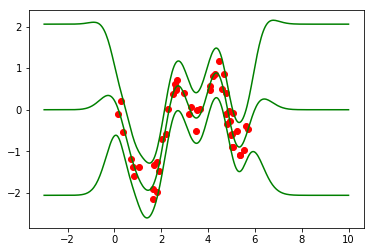

In [7]:
#plot the exact solution and the training data.
figA, axes = plt.subplots(1,1)
axes.plot(xtrain, ytrain, 'ro')
plotPredictions(axes, exact_model, 'g', None)

In [9]:
#Train VFE model initialized from the perfect solution
VFEmodel, VFEcb = trainSparseModel(xtrain, ytrain, exact_model, False, xtest, ytest)
print("Sparse model parameters for VFE optimization \n")
printModelParameters(VFEmodel)

repeatIndex  0


/Users/artemav/anaconda3/envs/tf/lib/python3.6/site-packages/gpflow-1.1.1-py3.6.egg/gpflow/training/external_optimizer.py:436: OptimizeWarning: Unknown solver options: tol
  result = scipy.optimize.minimize(*minimize_args, **minimize_kwargs)


repeatIndex  1
Sparse model parameters for VFE optimization 

Likelihood variance                                class prior transform  trainable shape  \
SGPR/likelihood/variance  Parameter  None       +ve       True    ()   

                          fixed_shape                value  
SGPR/likelihood/variance         True  0.07442949083091437   

Kernel variance                          class prior transform  trainable shape  fixed_shape  \
SGPR/kern/variance  Parameter  None       +ve       True    ()         True   

                                 value  
SGPR/kern/variance  0.9247536294244608   

Kernel lengthscale                              class prior transform  trainable shape  \
SGPR/kern/lengthscales  Parameter  None       +ve       True    ()   

                        fixed_shape               value  
SGPR/kern/lengthscales         True  0.5880129345030346   



In [10]:
#Train FITC model initialized from the perfect solution.
FITCmodel, FITCcb = trainSparseModel(xtrain,ytrain,exact_model,True,xtest,ytest)
print("Sparse model parameters for FITC optimization \n")
printModelParameters(FITCmodel)

repeatIndex  0


/Users/artemav/anaconda3/envs/tf/lib/python3.6/site-packages/gpflow-1.1.1-py3.6.egg/gpflow/training/external_optimizer.py:436: OptimizeWarning: Unknown solver options: tol
  result = scipy.optimize.minimize(*minimize_args, **minimize_kwargs)


repeatIndex  1
Sparse model parameters for FITC optimization 

Likelihood variance                                   class prior transform  trainable shape  \
GPRFITC/likelihood/variance  Parameter  None       +ve       True    ()   

                             fixed_shape                value  
GPRFITC/likelihood/variance         True  0.07442875797300474   

Kernel variance                             class prior transform  trainable shape  \
GPRFITC/kern/variance  Parameter  None       +ve       True    ()   

                       fixed_shape               value  
GPRFITC/kern/variance         True  0.9247492938944325   

Kernel lengthscale                                 class prior transform  trainable shape  \
GPRFITC/kern/lengthscales  Parameter  None       +ve       True    ()   

                           fixed_shape               value  
GPRFITC/kern/lengthscales         True  0.5880115362941997   



Text(0.5,1,'FITC')

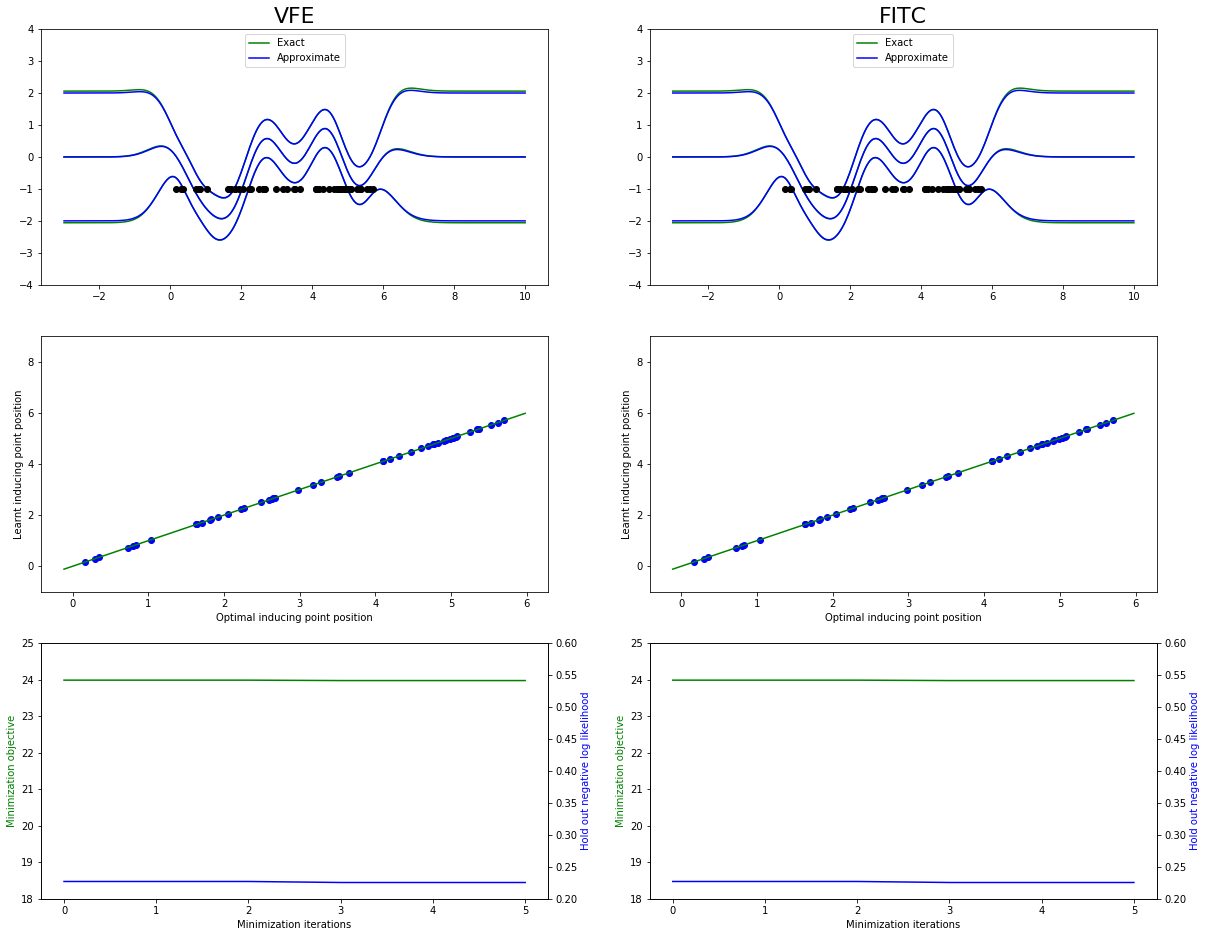

In [11]:
#Plot a comparison of the two algorithms. 
figB, axes = plt.subplots(3,2,figsize=(20, 16))
   
VFEiters = FITCcb.n_iters
VFElog_likelihoods = stretch(len(VFEiters), VFEcb.log_likelihoods)
VFEhold_out_likelihood = stretch( len(VFEiters), VFEcb.hold_out_likelihood)

plotComparisonFigure(xtrain, VFEmodel, exact_model, axes[0,0], axes[1,0], axes[2,0], VFEiters, VFElog_likelihoods.tolist(), VFEhold_out_likelihood.tolist(), "VFE")
plotComparisonFigure(xtrain, FITCmodel, exact_model, axes[0,1], axes[1,1], axes[2,1],FITCcb.n_iters, FITCcb.log_likelihoods, FITCcb.hold_out_likelihood , "FITC")

axes[0,0].set_title('VFE', loc='center', fontdict = {'fontsize': 22})
axes[0,1].set_title('FITC', loc='center', fontdict = {'fontsize': 22})  